In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from textblob import TextBlob
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [2]:
#importing the dataset
pol_comments = pd.read_csv("twitter.csv",lineterminator='\n')

In [3]:
#viewing the dataset
pol_comments.head(10)

,_id,created_at,text,user.id,user.name,user.geo_enabled,retweeted_status.user.profile_image_url_https,retweeted_status.user.default_profile,timestamp_ms
0,5fa47cdd9c7b0079e1c7e05d,Thu Nov 05 22:29:43 +0000 2020,"RT @tcs_na: Our Rahul Sarangdhar, Client Partn...",770606,I am Juan,True,https://pbs.twimg.com/profile_images/130847230...,True,1604615383528
1,5fa47cdd9c7b0079e1c7e05e,Thu Nov 05 22:29:43 +0000 2020,RT @kohakuh1: 新曲です！「春になっても」\nhttps://t.co/1fkZ...,1000363916743008256,るべい＠DTM 11/06新曲公開,False,https://pbs.twimg.com/profile_images/127100759...,True,1604615383580
2,5fa47ce09c7b0079e1c7e05f,Thu Nov 05 22:29:46 +0000 2020,RT @IAM__Network: Actionable Strategies for Mi...,1257170815881228295,Machine Learning Bot,False,https://pbs.twimg.com/profile_images/701708113...,False,1604615386653
3,5fa47ce19c7b0079e1c7e060,Thu Nov 05 22:29:47 +0000 2020,RT @davidtalby: The #DataScientist Learning Jo...,1220022208279515140,API Trends,False,https://pbs.twimg.com/profile_images/333825182...,False,1604615387177
4,5fa47ce29c7b0079e1c7e061,Thu Nov 05 22:29:48 +0000 2020,RT @TamaraMcCleary: #AI and #automation will h...,23522633,Bassam Zarkout,False,https://pbs.twimg.com/profile_images/125569353...,False,1604615388147
5,5fa47ce49c7b0079e1c7e062,Thu Nov 05 22:29:49 +0000 2020,Wyyyyyyyy by Tazz. #AI #GenerativeArt #Psycede...,1318972588379484160,Comment To Art,False,NaN,NaN,1604615389760
6,5fa47ce69c7b0079e1c7e063,Thu Nov 05 22:29:52 +0000 2020,RT @IAM__Network: Actionable Strategies for Mi...,3040871649,HubofMachineLearning,False,https://pbs.twimg.com/profile_images/701708113...,False,1604615392655
7,5fa47ce79c7b0079e1c7e064,Thu Nov 05 22:29:53 +0000 2020,"Aghju vistu stu gran filmettu, una maraviglia ...",117036939,Alain Esco,True,NaN,NaN,1604615393269
8,5fa47ce99c7b0079e1c7e065,Thu Nov 05 22:29:54 +0000 2020,The latest The Mexicanese Marketer! https://t....,79924984,Jenny Fukumoto-Pasko,True,NaN,NaN,1604615394739
9,5fa47ce99c7b0079e1c7e066,Thu Nov 05 22:29:55 +0000 2020,"RT @FindTampaJobs: Vantagepoint ai, LLC has a ...",772361408956731392,Industry 4.0,False,https://pbs.twimg.com/profile_images/109397693...,False,1604615395105


In [4]:
# seeing the available columns in the dataset
pol_comments.columns

Index(['_id', 'created_at', 'text', 'user.id', 'user.name', 'user.geo_enabled',
       'retweeted_status.user.profile_image_url_https',
       'retweeted_status.user.default_profile', 'timestamp_ms'],
      dtype='object')

In [5]:
#checking the shape of dataset
pol_comments.shape

(147109, 9)

In [6]:
# assigning the dataset to dataframe
df = pd.DataFrame(pol_comments)

In [7]:
#checking the shape of dataset
df.shape

(147109, 9)

In [8]:
#data preprocessing
#converting the comments into text
df['com'] = df['text'].astype(str)

In [9]:
# checking for one row
df['com'][2]

'RT @IAM__Network: Actionable Strategies for Mitigating Risks &amp; Driving Adoption with Responsible Machine Learning \n\nREAD MORE: https://t.co…'

In [10]:
# to lowercase everything 
df['com'] = df['com'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [11]:
df['com']

0         rt @tcs_na: our rahul sarangdhar, client partn...
1         rt @kohakuh1: 新曲です！「春になっても」 https://t.co/1fkzw...
2         rt @iam__network: actionable strategies for mi...
3         rt @davidtalby: the #datascientist learning jo...
4         rt @tamaramccleary: #ai and #automation will h...
                                ...                        
147104    note to self: do not call aunt a whornacopia a...
147105                                      qué cosas no? 🤣
147106    rt @trumpsloveforus: 👇👇👇👇👇 https://t.co/8c02ps...
147107    rt @tombx7m: for the most unintentional honest...
147108    🗽🔥🗽 trump wears a -diaper not happy that it -l...
Name: com, Length: 147109, dtype: object

In [12]:
#removing the punctuation
df['com'] = df['com'].str.replace('[^\w\s]','')

In [13]:
# viewing overall preprocessed data
df['com']

0         rt tcs_na our rahul sarangdhar client partner ...
1         rt kohakuh1 新曲です春になっても httpstco1fkzwegzwa aiきり...
2         rt iam__network actionable strategies for miti...
3         rt davidtalby the datascientist learning journ...
4         rt tamaramccleary ai and automation will help ...
                                ...                        
147104    note to self do not call aunt a whornacopia at...
147105                                        qué cosas no 
147106               rt trumpsloveforus  httpstco8c02ps5bop
147107    rt tombx7m for the most unintentional honest m...
147108     trump wears a diaper not happy that it leaked...
Name: com, Length: 147109, dtype: object

In [14]:
# function for calucalting sentimental analysis
def senti(x):
    return TextBlob(x).sentiment

In [15]:
df['senti_score'] = df['com'].apply(senti)

In [16]:
mw = df['senti_score']

In [17]:
#viewing the sentimental score consists of polarity,subjectivity
mw

0            (0.0, 0.0)
1            (0.0, 0.0)
2         (0.35, 0.525)
3            (0.0, 0.0)
4            (0.0, 0.0)
              ...      
147104     (0.0, 0.125)
147105       (0.0, 0.0)
147106       (0.0, 0.0)
147107      (0.55, 0.7)
147108     (-0.2, 0.75)
Name: senti_score, Length: 147109, dtype: object

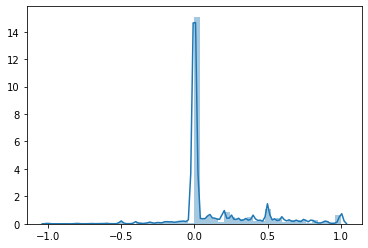

In [18]:
import seaborn as sns
sns.distplot([mw])
#[mw].mean()